In [2]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import copy

In [3]:
pwd

'/home/kasra/anaconda3/envs/wine-project'

# Q1

## datasets

In [20]:
#Columns/Features
D = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'style'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set

wine = pd.read_csv("wine_dataset.csv",sep = ',')

print(len(wine))

6497


In [21]:
wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  style  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

## splitting data

In [22]:
# split wine dataset with all features with color label

X = wine[D].values
y = np.ravel(wine[[C]])


 
ran = 42
X_train, X_test, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state = ran)


# split wine dataset with all feature with quality label


X = wine[D].values
y = np.ravel(wine[[L]])


 
ran = 42
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y, test_size=0.2, random_state = ran)
X_train

X_train = pd.DataFrame(X_train,columns = D)# converting X_train and test to data frame to calculate the zscore in the next function
X_test = pd.DataFrame(X_test,columns = D)

## normalized data

In [23]:
# normalizing dataset


def z_score_normalize(training_dataset, test_dataset, columns_to_normalize):
    training_dataset_1 = copy.deepcopy(training_dataset)
    test_dataset_1 = copy.deepcopy(test_dataset)
    combined = pd.concat([training_dataset, test_dataset])
    for i in [x for x in training_dataset.columns if x in columns_to_normalize]:
        mean = combined[i].mean() # calculates the mean of the training data
        std = combined[i].std(ddof=0) # calculates the std of the training data
        test_dataset_1[i] = (test_dataset[i] - mean) / std
        training_dataset_1[i] = (training_dataset[i] - mean) / std

    return training_dataset_1, test_dataset_1

X_train_norm, X_test_norm = z_score_normalize(X_train,X_test,D)


print(len(X_train_norm))
print(len(X_test_norm))

5197
1300


### normalized data

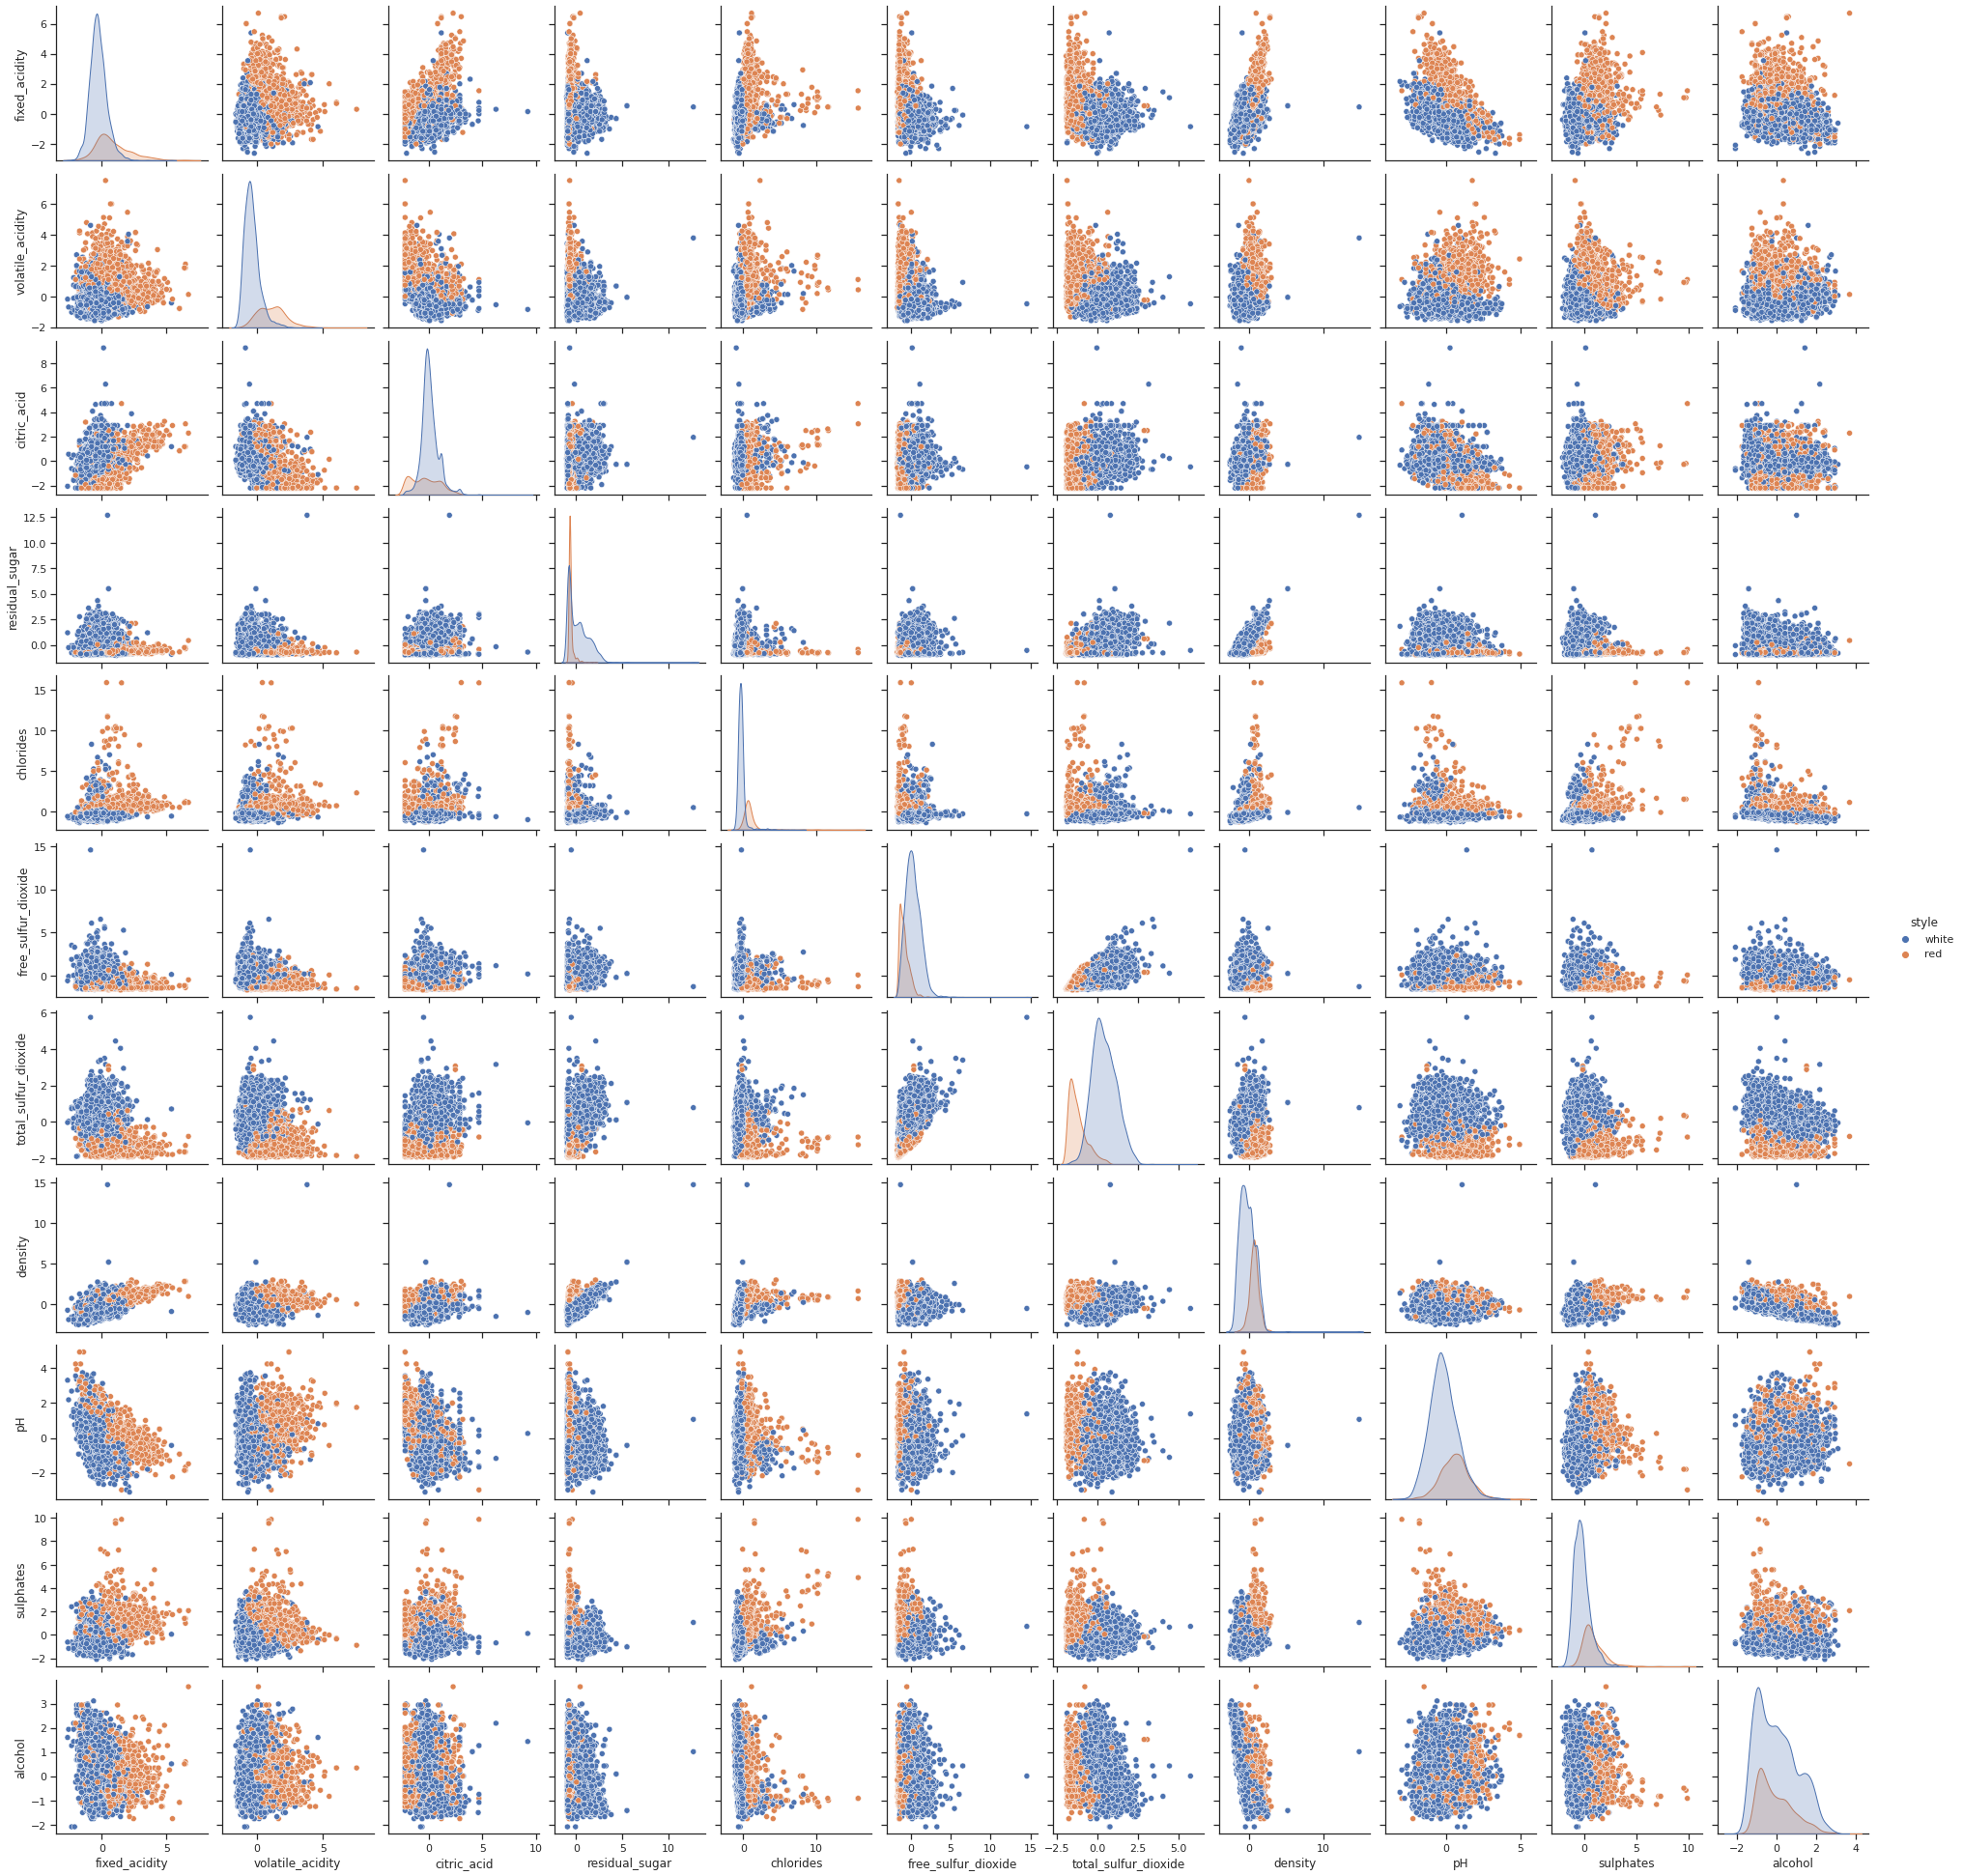

In [58]:
# plotting normalized data
y = pd.concat([pd.DataFrame(y_train_c,columns = [C]),pd.DataFrame(y_test_c,columns = [C])],ignore_index=True)
x = pd.concat([X_train_norm,X_test_norm],ignore_index=True)
x = pd.concat([x,y],axis=1)
sns.pairplot(x,hue=C)

### unnormalized data

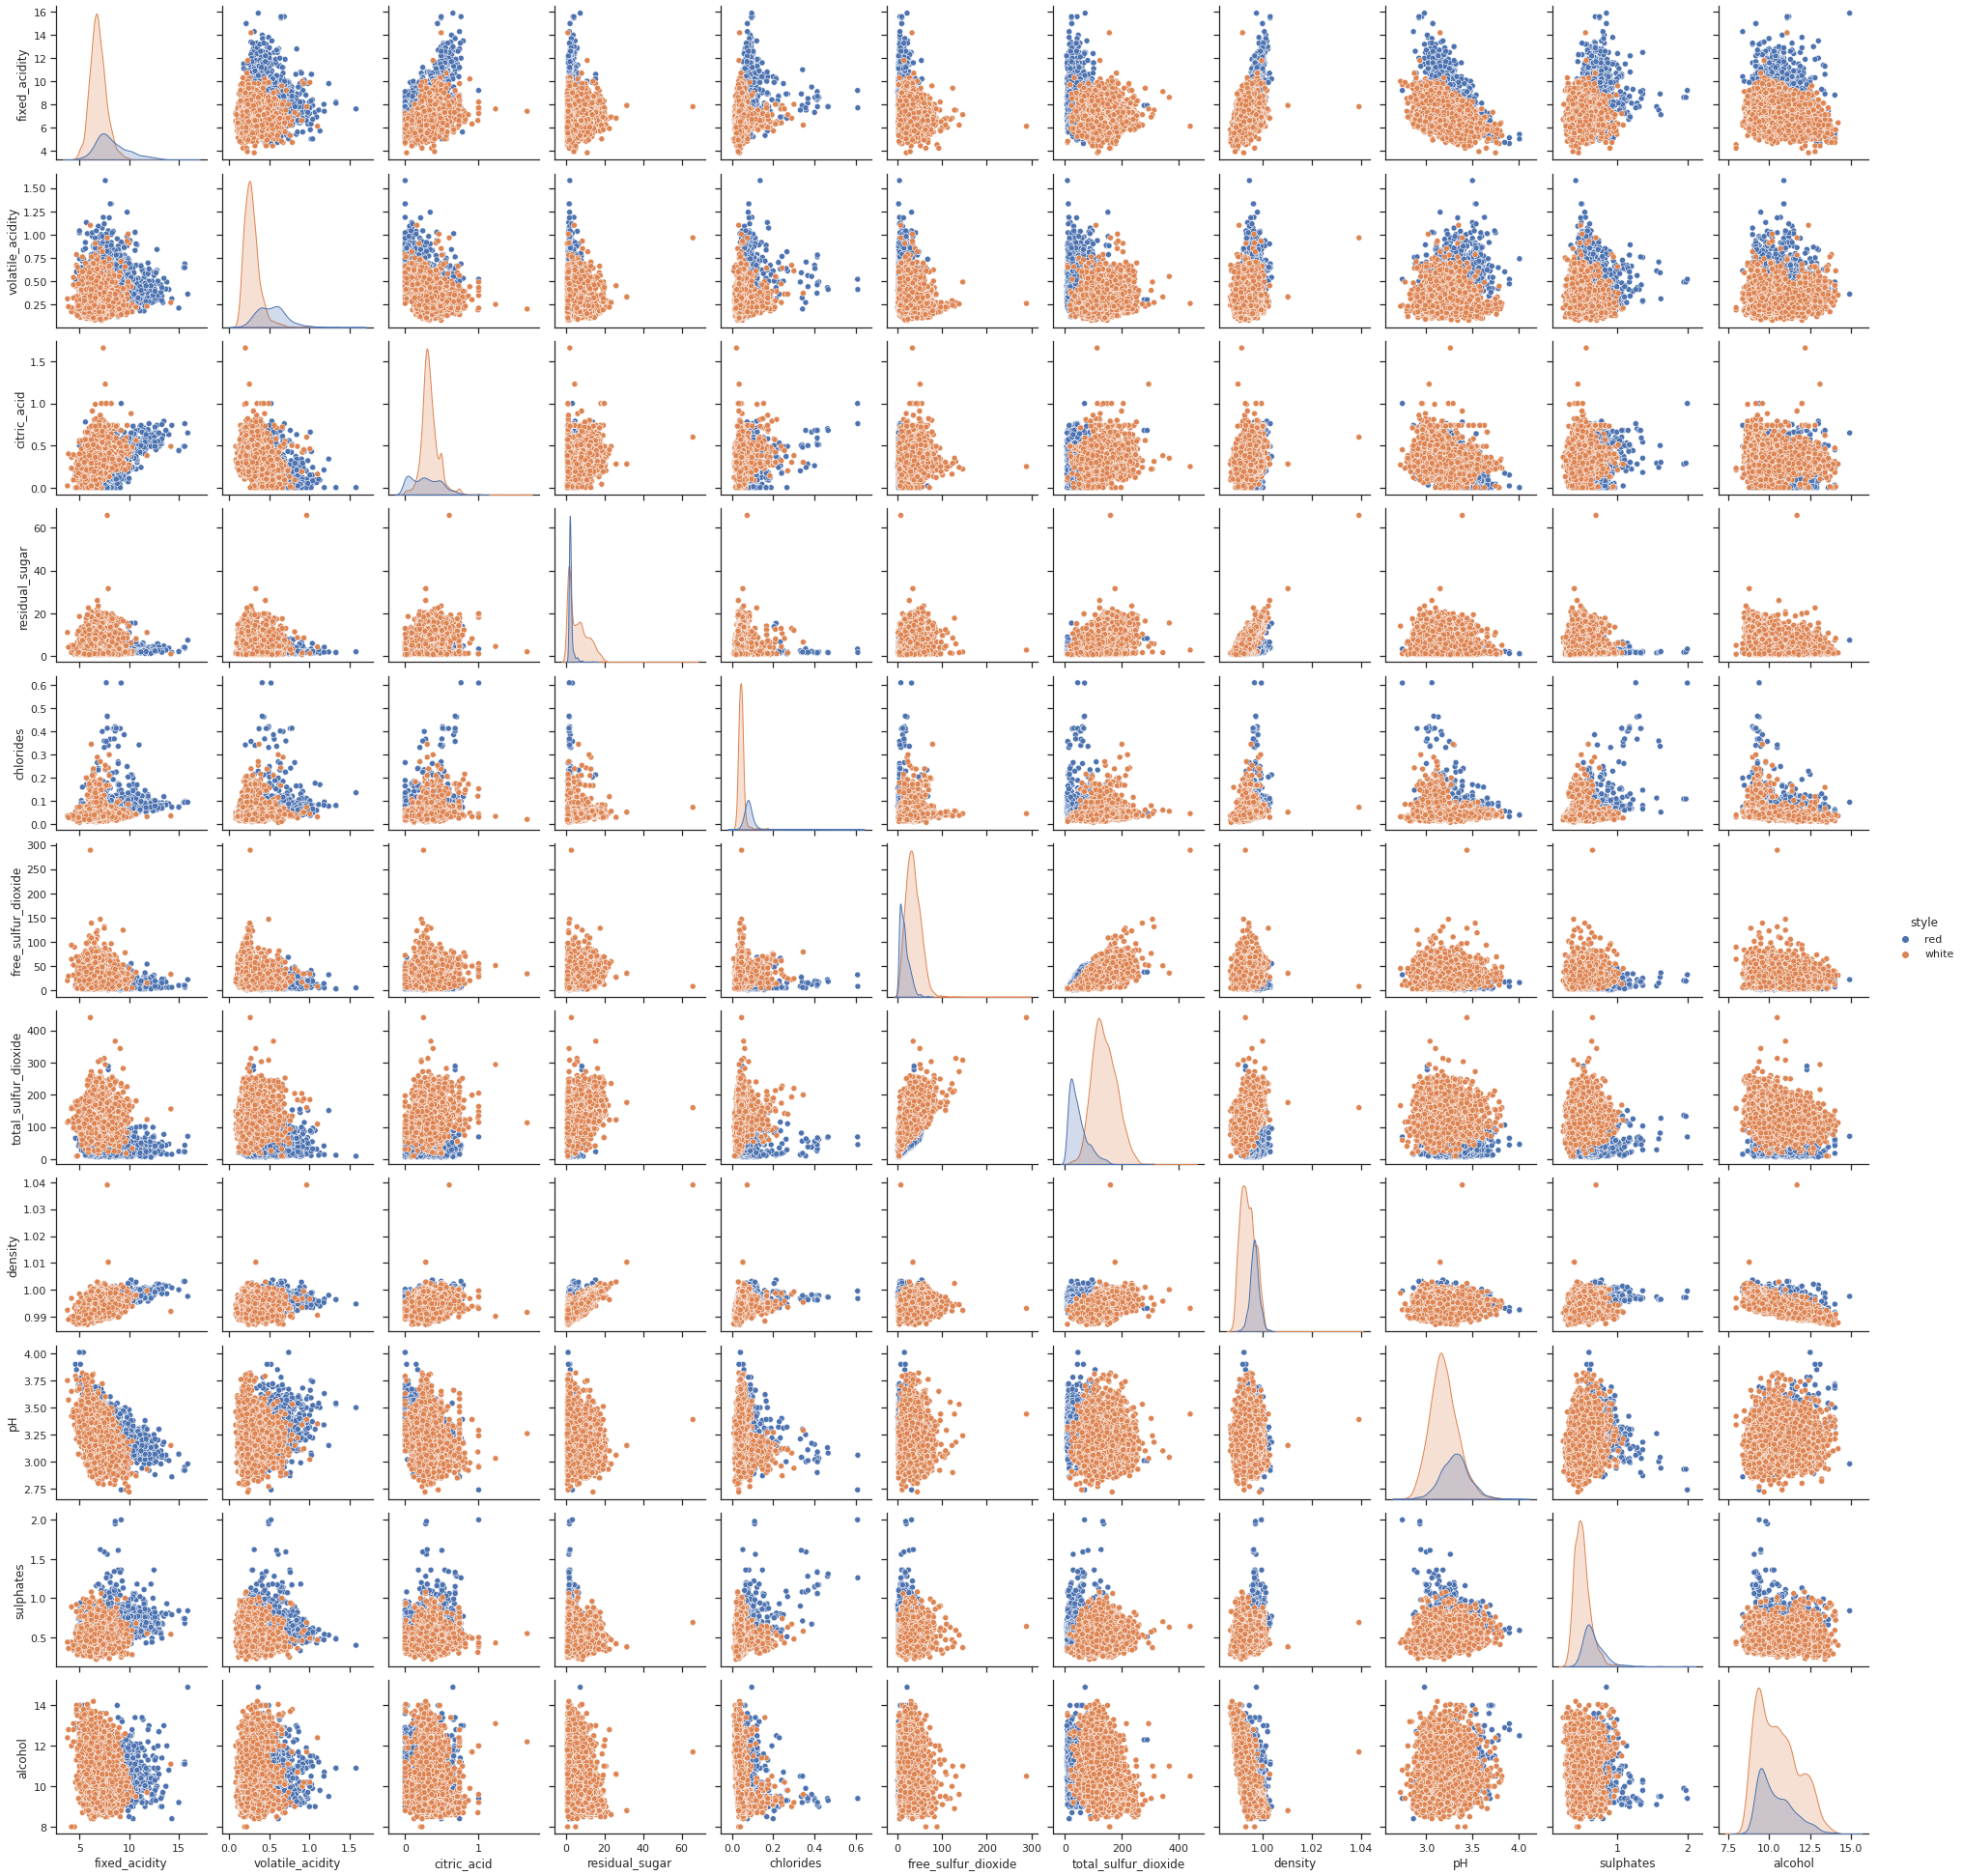

In [59]:
#plotting unnormalized data
sns.pairplot(wine[DC],hue = C)

### Discussion

the data is colored by color label. as shown in the pair plots, after we normalize the datasets, the scale of each plot is changed and all of them are in a close range from each other. in other words, the data itself has not changed but the range of each feature is changed and is in a specific range after normalization. for instance, if we take density and fixed acidity are slightly correlated. However, the range of these two are very different. as fixed acidity changes from 0 to 15 and density changes from zero to 1 but after normalization the range of both is zero to 5. 
additionally, it is observable that the data can be well separated when we color the data by color labels as it is shown above.

## classification
### KNN normalized color labels
the results are shown based on the number of neighbors and the accuracy that that neighbor gives.   
for instance the first result is:  
K = 3  
accuracy = 0.994615


In [60]:
#uniform KNN on normalized color data


n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to the same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_norm, y_train_c)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')




# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_norm, y_train_c)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')


# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_norm, y_train_c)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))



uniform KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.994615
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    1
dtype: int64
maximum accuracy:  distance    0.993846
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    1
dtype: int64
maximum accuracy:  distance    0.994615
dtype: float64


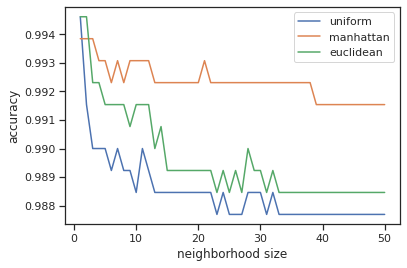

In [61]:
plt.plot(n_neighborslist,acc_u[1:])
plt.plot(n_neighborslist,acc_m[1:])
plt.plot(n_neighborslist,acc_e[1:])
plt.xlabel('neighborhood size')
plt.ylabel('accuracy')
plt.legend(['uniform','manhattan','euclidean'],loc = 'upper right')
plt.show()

### KNN normalized quality labels

In [62]:
#uniform KNN on normalized quality data


n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_norm, y_train_q)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')




# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_norm, y_train_q)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')




# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_norm, y_train_q)
    y_pred = neigh.predict(X_test_norm)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))



uniform KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.606154
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    34
dtype: int64
maximum accuracy:  distance    0.693846
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    31
dtype: int64
maximum accuracy:  distance    0.683077
dtype: float64


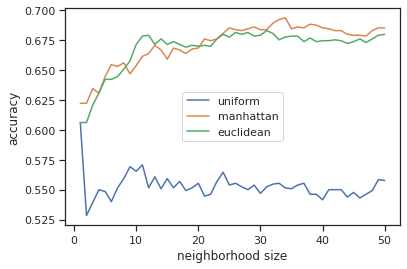

In [63]:
plt.plot(n_neighborslist,acc_u[1:])
plt.plot(n_neighborslist,acc_m[1:])
plt.plot(n_neighborslist,acc_e[1:])
plt.xlabel('neighborhood size')
plt.ylabel('accuracy')
plt.legend(['uniform','manhattan','euclidean'],loc = 'center')
plt.show()

## bonus 
### my own subset of features

In [69]:
X_train_norm.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Num Features: 4
Selected Features: [False  True False False  True  True False False False False  True]
Feature Ranking: [3 1 8 5 1 1 7 2 4 6 1]
[0.07837144 0.1041367  0.08307004 0.08281983 0.0835332  0.08476907
 0.08715065 0.09220905 0.08199683 0.08603799 0.1359052 ]


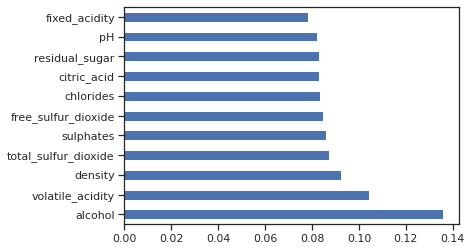

euclidean distance KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.6
dtype: float64
euclidean distance KNN
number of neighbors with maximum accuracy:  distance    22
dtype: int64
maximum accuracy:  distance    0.660769
dtype: float64
euclidean distance KNN
number of neighbors with maximum accuracy:  distance    22
dtype: int64
maximum accuracy:  distance    0.660769
dtype: float64


In [70]:
# classifying based on own selected features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import itertools


model = LogisticRegression(solver='lbfgs',max_iter=1000)
rfe = RFE(model, n_features_to_select= 4)
fit = rfe.fit(X_train_norm,y_train_q)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


model = ExtraTreesClassifier()
model.fit(X_train_norm,y_train_q)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_norm.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

X_train_selected = X_train_norm[['volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol']]
X_test_selected = X_test_norm[['volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol']]

# uniform

n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to the same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0]) 
    neigh.fit(X_train_selected, y_train_q)
    y_pred = neigh.predict(X_test_selected)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_u.at[k,col_names[0]] = accscore
#   max_acc.append([list(i),acc.max(axis=0)])
# print(max_acc)


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0))

#manhattan distance

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) 
    neigh.fit(X_train_selected, y_train_q)
    y_pred = neigh.predict(X_test_selected)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_m.at[k,col_names[0]] = accscore
#   max_acc.append([list(i),acc.max(axis=0)])
# print(max_acc)


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0))

# euclidean distance 
# max_acc = []
# for i in itertools.combinations(D,4):
#   X_train_selected = X_train_norm[list(i)]
#   X_test_selected = X_test_norm[list(i)]
n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) 
    neigh.fit(X_train_selected, y_train_q)
    y_pred = neigh.predict(X_test_selected)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_e.at[k,col_names[0]] = accscore
#   max_acc.append([list(i),acc.max(axis=0)])
# print(max_acc)


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))

I have used brute force to find the 4 features that perform the best on classifying the data. using manhattan and euclidean distance metric, I found that 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol' are the best features for classifying the data with accuracy of 0.699. the other graphs are explained at the end of Q1 in the discussion part.

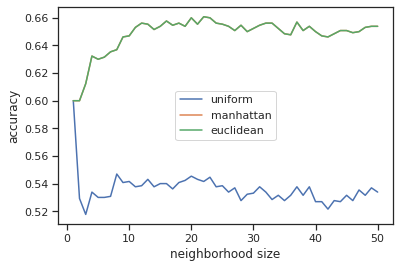

In [71]:
plt.plot(n_neighborslist,acc_u[1:])
plt.plot(n_neighborslist,acc_m[1:])
plt.plot(n_neighborslist,acc_e[1:])
plt.xlabel('neighborhood size')
plt.ylabel('accuracy')
plt.legend(['uniform','manhattan','euclidean'],loc = 'center')
plt.show()

## PCA
### KNN after applying PCA normalized data on color label

In [72]:
# PCA on normalized data
# Make an instance of the Model
pca = PCA(n_components = 5)
pca.fit(X_train_norm)

X_train_PCA = pca.transform(X_train_norm)
X_test_PCA = pca.transform(X_test_norm)



# applying KNN on the dataset with color label

n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')




# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')





# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))




uniform KNN
number of neighbors with maximum accuracy:  uniform    5
dtype: int64
maximum accuracy:  uniform    0.986923
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    6
dtype: int64
maximum accuracy:  distance    0.99
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    7
dtype: int64
maximum accuracy:  distance    0.989231
dtype: float64


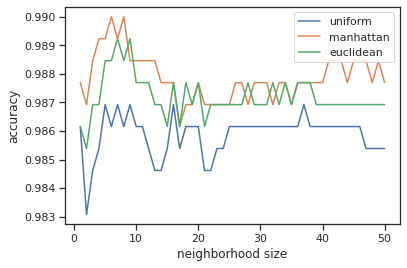

In [73]:
plt.plot(n_neighborslist,acc_u[1:])
plt.plot(n_neighborslist,acc_m[1:])
plt.plot(n_neighborslist,acc_e[1:])
plt.xlabel('neighborhood size')
plt.ylabel('accuracy')
plt.legend(['uniform','manhattan','euclidean'],loc = 'upper right')
plt.show()

### discussion 
As shown by the result of dataset with and without applying PCA, we can see that accuracy in classification without applying PCA was 0.994,0.996,0.995 for KNN weighted algorithm using uniform, manhattan distance and euclidean distance respectively. However, after applying PCA, number of features are reduced to 5 and hence the accuracy drops to 0.991,0.991,0.992 for the same weighted algorithms. 

### KNN after applying PCA unnormalized data color label

In [74]:
# pca on unnormalized data on color label
# Make an instance of the Model
pca = PCA(n_components = 5)
pca.fit(X_train_norm)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

# applying KNN on the dataset with color label

n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')


# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')


# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_PCA, y_train_c)
    y_pred = neigh.predict(X_test_PCA)
    accscore = accuracy_score(y_test_c, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))




uniform KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.956154
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    6
dtype: int64
maximum accuracy:  distance    0.963846
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    6
dtype: int64
maximum accuracy:  distance    0.965385
dtype: float64


### discussion
as shown above the accuracy has dropped almost 3% because of not normalizing the data. the accuracy of normalized data is 0.991,0.990,0.991. on the other hand,  the accuracy of unnormalized data is 0.963,0.960,0.963. 

### discussion
the reason for accuracy drop is Principal Components do not necessarily have any correlation to classification accuracy.
Consider a case where we have two variables: a person's mass (in grams)and body temperature (in degrees Celsius). we want to predict which people have the flu and which do not. In this case, weight has a much greater variance but probably no correlation to the flu, whereas temperature, which has low variance, has a strong correlation to the flu. After the Principal Components transformation, the first PC will be strongly aligned with mass (since it has much greater variance) so if we dropped the second PC, would be losing almost all of your classification accuracy.
PCA is an unsupervised transformation of the data. It does not consider labels of your training data when calculating the transformation (as opposed to something like Fisher's linear discriminant).

## LDA
### KKN after LDA applied on normalized data quality label

In [75]:
# applying KNN on dataset with quality label


lda = LDA(n_components=5)
X_train_LDA = lda.fit_transform(X_train_norm, y_train_q)
X_test_LDA = lda.transform(X_test_norm)


n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')




# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')





# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))



uniform KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.616154
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    35
dtype: int64
maximum accuracy:  distance    0.669231
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    33
dtype: int64
maximum accuracy:  distance    0.674615
dtype: float64


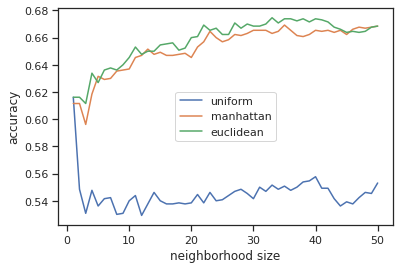

In [76]:
plt.plot(n_neighborslist,acc_u[1:])
plt.plot(n_neighborslist,acc_m[1:])
plt.plot(n_neighborslist,acc_e[1:])
plt.xlabel('neighborhood size')
plt.ylabel('accuracy')
plt.legend(['uniform','manhattan','euclidean'],loc = 'center')
plt.show()

### discussion
as shown in previous part without using PCA and LDA the result of KNN weighted algorithm was 0.63,0.695,0.689 and after applying LDA the accuracy has droped to 0.604,0.682,0.674. the reason for this slight drop in accuracy is because of the assumption of gaussian distribution and equal variance of all the features which in most cases are not true. However, the loss is not substantial. 

### KNN after LDA applied on unnormalized data

In [77]:
# applying KNN on dataset with quality label


lda = LDA(n_components=5)
X_train_LDA = lda.fit_transform(X_train, y_train_q)
X_test_LDA = lda.transform(X_test)


n_neighborslist = list(range(1,51))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_u=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_u.at[k,col_names[0]] = accscore

print('uniform KNN')
print('number of neighbors with maximum accuracy: ',acc_u.idxmax(axis=0))
print('maximum accuracy: ',acc_u.max(axis=0),'\n')




# manhattan distance KNN

n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_m=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 1) # p=1 changes the distance metric to manhattan distance
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_m.at[k,col_names[0]] = accscore


print('manhattan distance KNN')
print('number of neighbors with maximum accuracy: ',acc_m.idxmax(axis=0))
print('maximum accuracy: ',acc_m.max(axis=0),'\n')





# euclidean distance


n_neighborslist = list(range(1,51))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_e=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p = 2) # p=2 changes the distance metric to euclidean distance
    neigh.fit(X_train_LDA, y_train_q)
    y_pred = neigh.predict(X_test_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_e.at[k,col_names[0]] = accscore


print('euclidean distance KNN')
print('number of neighbors with maximum accuracy: ',acc_e.idxmax(axis=0))
print('maximum accuracy: ',acc_e.max(axis=0))



uniform KNN
number of neighbors with maximum accuracy:  uniform    1
dtype: int64
maximum accuracy:  uniform    0.616154
dtype: float64 

manhattan distance KNN
number of neighbors with maximum accuracy:  distance    35
dtype: int64
maximum accuracy:  distance    0.669231
dtype: float64 

euclidean distance KNN
number of neighbors with maximum accuracy:  distance    33
dtype: int64
maximum accuracy:  distance    0.674615
dtype: float64


### discussion 
LDA results has not changed on normalized and unnormalized data and the reason is that LDA is not affected by the stretching or compressing of the data. in both cases we have reduced the dimensions when performed LDA on them thus normalizing the data and changing the range of the data does not have any influence on the decision boundary of the LDA.

mathematically speaking:  
LDA finds a set of discriminant axes by computing eigenvectors of $W^{-1}B$, where W and B are within- and between-class scatter matrices. Equivalently, these are generalized eigenvectors of the generalized eigenvalue problem $Bv=λWv$.

Consider a centred data matrix $X$ with variables in columns and data points in rows, so that the total scatter matrix is given by $T=X^⊤X$. Standardizing the data amounts to scaling each column of $X$ by a certain number, i.e. replacing it with $X_{new}=XΛ$, where $Λ$ is a diagonal matrix with scaling coefficients (inverses of the standard deviations of each column) on the diagonal. After such a rescaling, the scatter matrix will change as follows: $T_{new}=Λ^TΛ$, and the same transformation will happen with Wnew and Bnew.

Let v be an eigenvector of the original problem, i.e.
$Bv=λWv$.
If we multiply this equation with $Λ$ on the left, and insert $ΛΛ^{−1}$ on both sides before v, we obtain
$ΛBΛΛ^{−1}v=λΛWΛΛ^{−1}v$,
i.e.
$B_{new}Λ^{−1}v=λW_{new}Λ^{−1}v$,
which means that $Λ^{−1}v$ is an eigenvector after rescaling with exactly the same eigenvalue $λ$ as before.

So discriminant axis (given by the eigenvector) will change, but its eigenvalue, that shows how much the classes are separated, will stay exactly the same. Moreover, projection on this axis, that was originally given by $Xv$, will now be given by $XΛ(Λ^{−1}v)=Xv$, i.e. will also stay exactly the same (maybe up to a scaling factor).

## feature selection

I have used recursive feature eloimination(RFE),feature importance and brute force to find the 4 features that perform the best on classifying the data. using brute force with euclidean distance metric, I found that 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol' are the best features for classifying the data with accuracy of 0.699 amongst all of the other methods. these features outperformed LDA and PCA. I have commented out the brute force part. the results from feature importance(alcohol,density,total sulfur dioxide,volatile acidity) is very close to the final features but the features recommended by RFE are not very accurate.

## LDA vs PCA
LDA has certainly worked better on our normalized dataset. the result of LDA on the data is at least 2% higher than PCA in almost every case. this is due to LDA having regards toward the label compared to PCA that is an unsupervised method and has no regards for the label of the dataset. however, LDA assumes that data has a normal distribution and equal class covariances which is not always true. using LDA and PCA did not improve accuracy and had less accuracy compared to other methods. however, the difference was not substantial. performance of PCA on normalized data was significantly improved compared to unnormalized data. however, LDA did not improve on normalized data in comparison to unnormalized data.

## plot of the first two components
### PCA

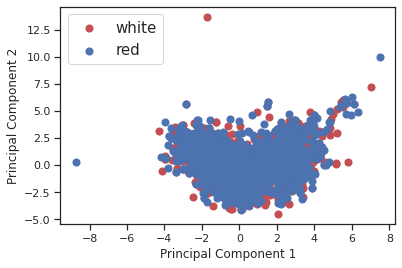

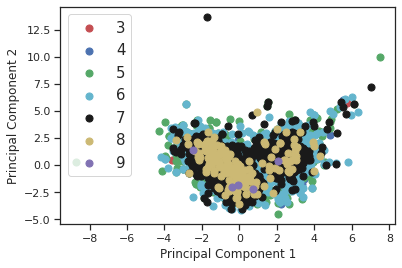

In [86]:
pca = PCA(n_components = 2)
pca.fit(X_train_norm)

X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

X_train_pca = pd.DataFrame(X_train_pca,columns = ["PC1","PC2"])
X_test_pca = pd.DataFrame(X_test_pca,columns = ['PC1','PC2'])
x = pd.concat([X_train_pca,X_test_pca])


colors = ['r','b']
targets = ['white','red']
for target, color in zip(targets,colors):
    indicesToKeep = wine['style'] == target
    plt.figure(1)
    plt.scatter(x.loc[indicesToKeep,'PC1']
               , x.loc[indicesToKeep,'PC2'], c = color, s = 50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.legend(targets,prop={'size': 15})


colors = ['r','b','g','c','k','y','m']
labels = [3,4,5,6,7,8,9]
for label, color in zip(labels,colors):
    indicesToKeep = wine['quality'] == label
    plt.figure(2)
    plt.scatter(x.loc[indicesToKeep,'PC1']
               , x.loc[indicesToKeep,'PC2'], c = color, s = 50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.legend(labels,prop={'size': 15})

### LDA

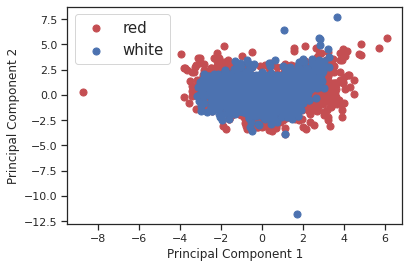

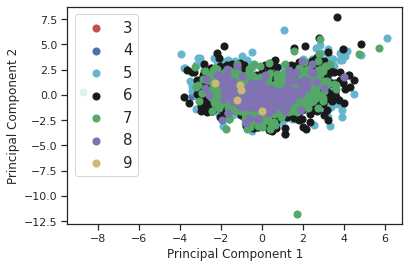

In [88]:
lda = LDA(n_components = 2)


X_train_lda = lda.fit_transform(X_train_norm,y_train_q)
X_test_lda = pca.transform(X_test_norm)

X_train_lda = pd.DataFrame(X_train_lda,columns = ["PC1","PC2"])
X_test_lda = pd.DataFrame(X_test_lda,columns = ['PC1','PC2'])
x = pd.concat([X_train_lda,X_test_lda])


colors = ['r','b']
targets = ['red','white']

for target, color in zip(targets,colors):
    indicesToKeep = wine['style'] == target
    plt.figure(1)
    plt.scatter(x.loc[indicesToKeep,'PC1']
               ,x.loc[indicesToKeep,'PC2'], c = color, s = 50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.legend(targets,prop={'size': 15})

colors = ['r','b','c','k','g','m','y']
targets = [3,4,5,6,7,8,9]

for target, color in zip(targets,colors):
    indicesToKeep = wine['quality'] == target
    plt.figure(2)
    plt.scatter(x.loc[indicesToKeep,'PC1']
               ,x.loc[indicesToKeep,'PC2'], c = color, s = 50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.legend(targets,prop={'size': 15})

in these four plots we can see that pca and lda have not worked well on the data and they have not separated the data well based on the first and second principal components. the data is basically collapsed on each other and it is not very well separated. compared to the pairplot the dimensions are different and because the principal components have not done a very good job separating the data we cannot say anything about the data before and after applying PCA.

# Q2

In [ ]:
import scipy as sc
from sklearn.preprocessing import StandardScaler,scale
import matplotlib
import chart_studio.plotly as py


data = pd.read_csv('/content/DataB.csv')
data.set_index('Unnamed: 0',inplace=True)
data.reset_index('Unnamed: 0',drop=True,inplace=True)
X = data.iloc[:,0:784].values
y = data.iloc[:,784].values

X_std = StandardScaler().fit_transform(X)
feat_cols = ['feature'+str(i) for i in range(X_std.shape[1])]
normalized_data = pd.DataFrame(X_std,columns=feat_cols)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(len(pca.components_))],pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explaned variance')

fig = plt.figure(figsize=(8,6))
plt.title('zoomed in plot')
plt.plot([i for i in range(len(pca.components_))],pca.explained_variance_)
plt.xlim(-10,100)
plt.xlabel('number of components')
plt.ylabel('explaned variance')

around 10 to 30 components seems to be important components for our case and explain the variance of the whole data the most. the best cut off in this case if we are to choose visually is around 20.

In [ ]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']
for i in range(19):
  for target, color in zip(targets,colors):
    indicesToKeep = data['gnd'] == target
    plt.figure(i+1)
    plt.scatter(X_pca.loc[indicesToKeep,i]
               , X_pca.loc[indicesToKeep,i+1], c = color, s = 50)
    plt.xlabel('Principal Component '+str(i+1))
    plt.ylabel('Principal Component '+str(i+2))

  plt.legend(targets,prop={'size': 15})

In [ ]:
proj_mat = pca.components_[0:2,:]
X_reduced = np.dot(X_std,proj_mat.T)
X_reduced = pd.DataFrame(X_reduced)

proj_mat2 = pca.components_[4:6,:]
X_reduced2 = np.dot(X_std,proj_mat2.T)
X_reduced2 = pd.DataFrame(X_reduced2)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(1)
  plt.scatter(X_reduced.loc[indicesToKeep,0]
              , X_reduced.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')

plt.legend(targets,prop={'size': 15})


for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(2)
  plt.scatter(X_reduced2.loc[indicesToKeep,0]
              , X_reduced2.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component 5')
  plt.ylabel('Principal Component 6')

plt.legend(targets,prop={'size': 15})

### discussion
Clearly the first and second components have a better distinction between different groups of data. as you can see in the first graph the data points are separated better than the second graph. 

## PCA and dual PCA


In [ ]:
import chart_studio.plotly as py
from operator import itemgetter
import time
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# pca from scratch
def pca(X,n_component):
  X_centered = X - np.mean(X, axis = 0) # center the data without normalizing the standard deviation
  cov_mat = np.cov(X_centered.T)
  eig_vals,eig_vecs = np.linalg.eig(cov_mat)

  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


  sorted(eig_pairs,key = itemgetter(0),reverse = True)# sorting the eigen values and eigen vectors
  
  # choose n first component to create the projection matrix
  matrix_w = np.zeros((len(X_centered.T),n_component))
  for i in range(n_component):
    matrix_w[:,i] = eig_pairs[i][1]
  

  X_proj = np.matmul(X_centered,matrix_w)# project the data into 

  return X_proj

t = time.time()
X_proj = pca(X,20)
elapsed = time.time() - t
print(elapsed)


In [ ]:
# dual PCA from scratch
def Dual_pca(X,n_component):
  X_centered = scale(X,with_std=False)
  mat = np.matmul(X_centered,X_centered.T)
  eig_vals,eig_vecs = np.linalg.eig(mat)


  eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
  sorted(eig_pairs,key=itemgetter(0),reverse = True)# sorting the eigen values and eigen vectors


  eig_values = np.zeros((X_centered.shape[0],1))
  sigma = np.zeros((len(X_centered),len(X_centered)))
  V_T = np.zeros((len(X_centered),len(X_centered)))
  for i in range(len(eig_pairs)):
    eig_values[i,0] = eig_pairs[i][0]
    V_T[:,i] = eig_pairs[i][1]# creating V transpose based on the svd 
  np.fill_diagonal(sigma,eig_values)

  
  U = np.matmul(X_centered.T,np.matmul(V_T.T,np.abs(np.linalg.inv(sigma.T))))
  proj_matrix = U[:,0:20]


  X_proj = np.matmul(U.T,X_centered.T)# project the data into p-dim space


  return X_proj

t = time.time()
X_final = Dual_pca(X,20)
elapsed = time.time() - t
print(elapsed)



## discussion

As shown above the time taken for pca to run and achieve results is 0.7 but dual pca is 11. the reason for that is that dual pca runs on a large dataset and the computation is also more than pca. in pca we just need to find U and we can project the data. however, using dual pca, we have to first find V_T and sigma and then compute U and after we have found U we can take n first components and project the data thus the computation is way heavier. that is why run time for dual pca is so much longer compared to pca.

## theoretical question

\begin{equation}
R := \tilde{X} - UU^T\tilde{X}\\
min\space\space\space || \tilde{X} - UU^T\tilde{X}||^2_F\\
s.t.\space\space\space U^TU = I\\
||\tilde{X} - UU^T\tilde{X}||^2_F = tr((\tilde{X}-UU^T\tilde{X})^T(\tilde{X}-UU^T\tilde{X}))\\
= tr((\tilde{X}^T - \tilde{X}^TUU^T)(\tilde{X} - UU^T\tilde{X}))\\
= tr(\tilde{X}^T\tilde{X} - 2\tilde{X}^TUU^T\tilde{X} + \tilde{X}^TUU^TUU^T\tilde{X})\\
= tr(\tilde{X}^T\tilde{X} - \tilde{X}^TUU^T\tilde{X})\\
= tr(\tilde{X}^T\tilde{X}) - tr(\tilde{X}^TUU^T\tilde{X})\\
= tr(\tilde{X}^T\tilde{X}) - tr(\tilde{X}\tilde{X}^TUU^T)\\
\mathscr{L} = tr(\tilde{X}^T\tilde{X}) - tr(\tilde{X}\tilde{X}^TUU^T) - tr(\Lambda^T(U^TU-I))\\
\frac{\partial L}{\partial U} = 2\tilde{X}\tilde{X}^TU - 2U\Lambda = 0\\
=> \tilde{X}\tilde{X}^TU = U\Lambda\\
=> SU = U\Lambda
\end{equation}
PCA minimizes the reconstruction error thus based on above proof we can conclude that PCA is the best linear projector in terms of reconstruction error.



# FDA

In [ ]:
lda = LDA(n_components=4)
X_lda = lda.fit_transform(X_std,y)
X_lda = pd.DataFrame(X_lda)


targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for i in range(3):
  for target, color in zip(targets,colors):
    plt.subplot(3,1,i+1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=3)
    indicesToKeep = data['gnd'] == target
    plt.scatter(X_lda.loc[indicesToKeep,i]
               , X_lda.loc[indicesToKeep,i+1], c = color, s = 50)
    plt.xlabel('Principal Component '+str(i+1))
    plt.ylabel('Principal Component '+str(i+2))

  plt.legend(targets,prop={'size': 15},loc = 'upper right')

## discussion

as we can see above first PC separates classes 0,1 and PC2 separates class 4. in the second graph PC2 separates 4 and PC3 separates 2,4 from 0,1 from 3. in the third graph we can see that PC3 separates 0,1 from 2,4 from 3 while PC4 separates class 2 from the rest of the classes pretty well. 

## theoretical question

\begin{equation}
maximize\space\space\space tr(U^TS_TU)\\
s.t. \space\space\space U^TS_WU = I\\
\mathscr{L} = tr(U^TS_TU) - tr(\Lambda^T(U^TS_WU - I))\\
\frac{\partial L}{\partial U} = 2S_TU - 2S_WU\Lambda = 0\\
2S_TU = 2S_WU\Lambda\\
=> S_TU = S_WU\Lambda
\end{equation}
which is the generalized eigen value problem.
\begin{equation}
A\phi = B\phi\Lambda\\
\end{equation}
by this optimization problem we can see that the optimization in FDA is similar to PCA with a slight difference. FDA direction maximizes the total variance of data same as PCA. However, FDA minimizes the within scatters of classes by using the labels. as we see the optimization above is generalized eigenvalue problem and the eigenvalue problem for $S_T$.                        
FDA:
\begin{equation}
max\space\space\space tr(U^TS_TU)\\
s.t.\space\space\space U^TS_WU = I
\end{equation}
PCA:
\begin{equation}
max \space\space\space tr(U^TS_TU)\\
s.t.\space\space\space U^TU = I
\end{equation}

as we see in practical questions the accuracy of FDA is higher than PCA and by mathematically calculating the formula we see that in addition to eigenvalues of $S_T$, FDA solves for $S_W$ as well by using the labels and that is the reason for higher accuracy.

# Q3

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE


data = pd.read_csv('/content/DataB.csv')
data.set_index('Unnamed: 0',inplace=True)
data.reset_index('Unnamed: 0',drop=True,inplace=True)
X = data.iloc[:,0:784].values
y = data.iloc[:,784].values

X_std = StandardScaler(with_std=False).fit_transform(X)
feat_cols = ['feature'+str(i) for i in range(X_std.shape[1])]
normalized_data = pd.DataFrame(X_std,columns=feat_cols)

In [ ]:
#Kernel_PCA

t = time.time()
kernel_pca = KernelPCA(n_components=2,kernel='rbf',random_state=42)
X_kernel = kernel_pca.fit_transform(X_std)
X_kernel = pd.DataFrame(X_kernel)

elapsed = time.time() - t
print(elapsed)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(1)
  plt.title('Kernel_PCA')
  plt.scatter(X_kernel.loc[indicesToKeep,0]
              , X_kernel.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})


## discussion
As shown above after applying kernel PCA the data is not well seperated along first and second principal components. basically what kernel PCA does is that it uses a kernel function to bring the data to a larger subspace and then check the similarities by calculating the dot product or cosine between the data points. the reason that it has not worked well in this case is because the rbf kernel that we have chosen has not projected the data points to the new subspace very well hence the similarity between data points are still too high and that causes the result not to be well separated by first and second principal components.

In [ ]:
# ISOmap

t = time.time()
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_std)
X_isomap = pd.DataFrame(X_isomap)

elapsed = time.time() - t
print(elapsed)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(2)
  plt.title('ISOmap')
  plt.scatter(X_isomap.loc[indicesToKeep,0]
              , X_isomap.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})


## discussion
in ISOmap the way that the algorithm measures the distance of the data by choosing k nearest naighbors and pick the shortest distance between the data point and its neighbors. using this technique it will find an estimate of the distance between datapoints on a manifold. as shown above, this method has separated the data quite well due to measuring the true distance between datapoints and unmanifold the data. using this method, the distance of the datapoints are measured by their distance from each other rather than the similarities between data points. secondly, the data is not projected to a larger subspace using a function (in the case of kernel pca,a kernel function).

In [ ]:
# Locally Linear Embedding

t = time.time()
lle = LocallyLinearEmbedding(n_components=2,random_state=42)
X_lle = lle.fit_transform(X_std)
X_lle = pd.DataFrame(X_lle)

elapsed = time.time()
print(elapsed)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(3)
  plt.title("Locally Linear Embedding")
  plt.scatter(X_lle.loc[indicesToKeep,0]
              , X_lle.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})

targets = [1]
colors = ['b']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(4)
  plt.title("Locally Linear Embedding gnd == 1")
  plt.scatter(X_lle.loc[indicesToKeep,0]
              , X_lle.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})



## discussion

according to the graph above, you can see that LLE has also done a good job on reducing the demensionality without damaging the data. the only problem is the first class that falls under the same range as the third and forth class and hence it is not shown in the graph which means that the first and second PC could not separate the class 1 from 3,4,2 very well but other classes are well separated by PC1 and PC2. LLE works in a similar way to ISOmap but instead of calculating shortest distance between each datapoint and its K nearest neighbors it will use a weighted approach in order to choose the next neighbor. both ISOmap and LLE work better than kernel PCA due to the difference between measuring the similarities of datapoints.

In [ ]:
#Laplacian Eigenmap

t = time.time()
lap_eig = SpectralEmbedding(n_components=2,random_state=42)
X_lap_eig = lap_eig.fit_transform(X_std)
X_lap_eig = pd.DataFrame(X_lap_eig)

elapsed = time.time() - t
print(elapsed)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(5)
  plt.title("Laplacian Eigenmap")
  plt.scatter(X_lap_eig.loc[indicesToKeep,0]
              , X_lap_eig.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})



## discussion

as shown above the data is not very well separated on the first and second principal components. the laplacian eigenmap preserves the locality of the data points meaning that if two data points are close to each other they will have a large weight on them and they will appear close to each other in the unmanifolded space but if they are far apart the method does not take it into account and will count for it to happen naturally which may not always be true like in this case. by making sure that the close by points stay close to each other and to force the dat to reduce the dimension the far datapoints will naturally be far from each other in the unmanifolded space.

In [ ]:
#t-SNE
t = time.time()
tsne = TSNE(n_components=2,)
X_tsne = tsne.fit_transform(X_std)
X_tsne = pd.DataFrame(X_tsne)

elapsed = time.time() - t
print(elapsed)

targets = [0,1,2,3,4]
colors = ['r','b','g','k','m']

for target, color in zip(targets,colors):
  indicesToKeep = data['gnd'] == target
  plt.figure(6)
  plt.title("t-SNE")
  plt.scatter(X_tsne.loc[indicesToKeep,0]
              , X_tsne.loc[indicesToKeep,1], c = color, s = 50)
  plt.xlabel('Principal Component '+str(1))
  plt.ylabel('Principal Component '+str(2))

plt.legend(targets,prop={'size': 15})

## runtime
kernel PCA: 0.37    
ISOmap: 8    
LLE: 1583261566.6652377    
Laplacian eigenmap:9   
t-sne: 21

## discussion

t-sne instead of using the distances between data points, it will convert them to probability of each data point being in a class. t-sne uses density measurements(KL divergence) in order to project the data. by using KL divergence we can say that if two datapoints are neighbors and the projected datapoints are not neighbors the cost will be high and minimizing the cost function will not be feasible. if the datapoints are far from each other and the projection is close then the cost will be low. as shown above by using density to project the data we get a very well separated data containing each class. As it is observable above every class is well separated with very little misplaced data which is due to mistakenly putting far apart points in the original dimension together as it projects them. 

two criteria that we can differnetiate each method are: separatbility and runtime. 

in case of separability,t-sne worked best on the data and classified the data based on the first and second PCs which the linear methods did by taking 20 PCs. 

in case of runtime, you can see that the runtime of t-sne is longer than other methods(except for LLE which is not a reliable time, or maybe the units are different) and that is due to calculating the probability of each datapoint belonging to each class and calculating the KL divergence.